In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
current_dir = Path.cwd()
parent_dir = current_dir.parent.parent

In [14]:
all_data = pd.read_pickle(parent_dir/"Resources"/"FinalData"/'training_data.pkl')
all_data.columns.get_level_values(0).unique()

Index(['Player Status', 'Inning Data', 'Batting Stats', 'Bowling Stats',
       'Ground Data', 'Final Output'],
      dtype='object')

In [18]:
final_score = all_data['Final Output'].groupby(level = [0]).apply(max)

In [6]:
inning_data = pd.read_pickle(parent_dir/"Resources"/'match_data.pkl')

In [9]:
all_data['Ground Data'].idxmax(axis = 1)

Match Code  Over  Ball
211028      0     0                        (-, The Rose Bowl)
                  1                        (-, The Rose Bowl)
                  2                        (-, The Rose Bowl)
                  3                        (-, The Rose Bowl)
                  4                        (-, The Rose Bowl)
                                         ...                 
1381457     7     4       (-, National Sports Academy, Sofia)
                  5       (-, National Sports Academy, Sofia)
            8     0       (-, National Sports Academy, Sofia)
                  1       (-, National Sports Academy, Sofia)
                  2       (-, National Sports Academy, Sofia)
Length: 120546, dtype: object

In [11]:
ground_player_lineup = pd.read_pickle(parent_dir / "Resources/ground_player_lineup.pkl")
#ground_player_lineup

In [17]:
ground_player_lineup

Details                \
                                       Ground Name   Winner Name   
Match Code                                                         
1381452        Sportpark Het Schootsveld, Deventer       Germany   
1381451        Sportpark Het Schootsveld, Deventer       Germany   
1381456             National Sports Academy, Sofia        Turkey   
1381457             National Sports Academy, Sofia        Serbia   
1381458             National Sports Academy, Sofia      Bulgaria   
...                                            ...           ...   
225271                               The Rose Bowl     Sri Lanka   
238195                       New Wanderers Stadium  South Africa   
226374      Brisbane Cricket Ground, Woolloongabba     Australia   
211028                               The Rose Bowl       England   
211048                                   Eden Park     Australia   

                                            Batting Team                 \
            Batting Team  Bowling Team                P1             P2   
Match Code                                                                
1381452          Austria       Germany  M Simpson-Parker  Iqbal Hossain   
1381451          Austria       Germany  M Simpson-Parker  Iqbal Hossain   
1381456          Croatia        Turkey          WK Bitis    Naseem Khan   
1381457          Croatia        Serbia          A Daxini    Naseem Khan   
1381458           Turkey      Bulgaria    Ilyas Ataullah         I Elec   
...                  ...           ...               ...            ...   
225271         Sri Lanka       England     ST Jayasuriya    WU Tharanga   
238195      South Africa     Australia          GC Smith      LE Bosman   
226374         Australia  South Africa          JR Hopes      DR Martyn   
211028           England     Australia    ME Trescothick       GO Jones   
211048         Australia   New Zealand      AC Gilchrist      MJ Clarke   

                                                                               \
                          P3            P4               P5                P6   
Match Code                                                                      
1381452      Razmal Shigiwal    A Randhawa     Shahil Momin       Mirza Ahsan   
1381451      Razmal Shigiwal    A Randhawa      Mirza Ahsan      Shahil Momin   
1381456            P Bosnjak  Sohail Ahmad         A Daxini           V Zanko   
1381457            P Bosnjak       V Zanko     A Magdalenic          WK Bitis   
1381458            A Turkmen        R Nath         M Ozturk  Muhammed Turkmen   
...                      ...           ...              ...               ...   
225271      DPMD Jayawardene    TM Dilshan    KC Sangakkara         RP Arnold   
238195              HH Gibbs    SM Pollock  JJ van der Wath    AB de Villiers   
226374            RT Ponting     A Symonds        MJ Clarke        MEK Hussey   
211028            A Flintoff  KP Pietersen       MP Vaughan    PD Collingwood   
211048             A Symonds    RT Ponting        DR Martyn         SM Katich   

            ...    Bowling Team                                    \
            ...              P2               P3               P4   
Match Code  ...                                                     
1381452     ...   J van Heerden    MJ Richardson  Faisal Mubashir   
1381451     ...   J van Heerden  VB Chikkannaiah  Faisal Mubashir   
1381456     ...  Ilyas Ataullah        A Turkmen           R Nath   
1381457     ...        A Dizija        LA Dunbar      MV Pavlovic   
1381458     ...       Zain Asif      Zaid Soulat         P Mishra   
...         ...             ...              ...              ...   
225271      ...      AJ Strauss     KP Pietersen   PD Collingwood   
238195      ...       SM Katich       RT Ponting        DR Martyn   
226374      ...    HH Dippenaar         HH Gibbs       MV Boucher   
211028      ...       ML Hayden        A Symonds        MJ Clarke   
211048 

In [22]:
ground_score = final_score.merge(ground_player_lineup['Details', 'Ground Name'], left_index = True, right_index = True, how = 'left')
ground_score

,Output Score,Details
,Score,Ground Name
211028,179,The Rose Bowl
211048,214,Eden Park
225271,163,The Rose Bowl
226374,209,"Brisbane Cricket Ground, Woolloongabba"
238195,201,New Wanderers Stadium
...,...,...
1381451,115,"Sportpark Het Schootsveld, Deventer"
1381452,123,"Sportpark Het Schootsveld, Deventer"
1381453,181,"National Sports Academy, Sofia"


In [27]:
ground_score.boxplot(column = 'Output Score', by = 'Details')

ValueError: Grouper for 'Details' not 1-dimensional

<AxesSubplot:>

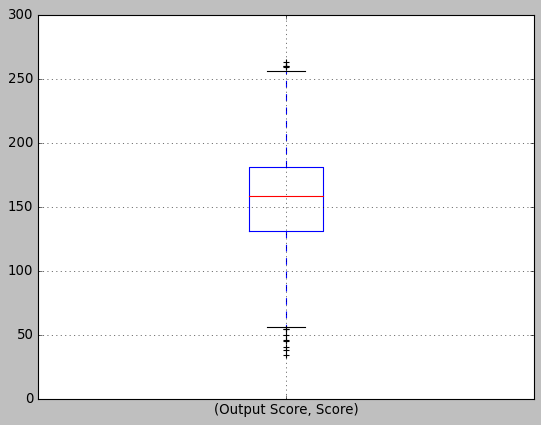

In [28]:
ground_score.boxplot()